# Imports

In [25]:
#***** Imports*******************

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Preparemos data de prueba (Creación de data)

* Creo data

In [26]:
#puedo decirle que me devuelva los centroides para saberlos
# y hacer preubas
X,y,c = make_blobs(n_samples=500, centers =4, n_features=2,
                 return_centers = True)

In [27]:
c

array([[ 4.7601866 ,  7.52522644],
       [-1.46762101,  6.53575932],
       [-6.1658885 ,  1.54612401],
       [ 4.64475475, -2.96787181]])

* Creación Dataframe data

In [28]:
# 3 features, x' datos por cols, y
df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y':y
})

In [29]:
df_blobs.head(3)

,x1,x2,y
0,4.426505,-2.398724,3
1,-6.098748,1.506541,2
2,-2.541659,5.276889,1


* Creo data con centroides

In [30]:
df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1]
})

In [31]:
df_centers

,x1,x2
0,4.760187,7.525226
1,-1.467621,6.535759
2,-6.165888,1.546124
3,4.644755,-2.967872


# Visualización de datos

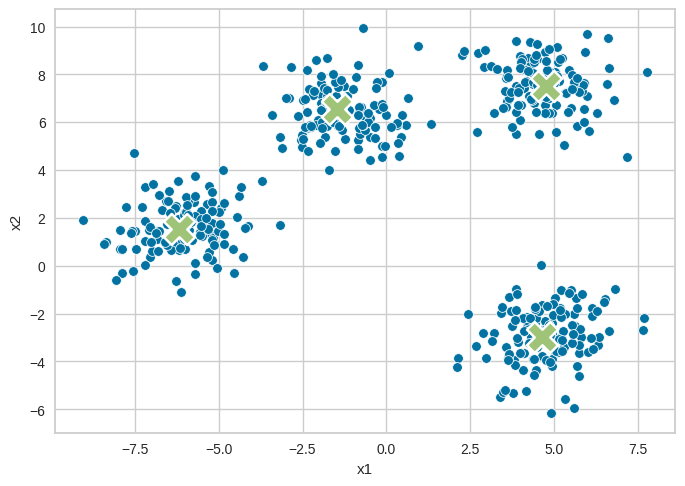

In [32]:
#Grafica de data
sns.scatterplot(data=df_blobs, x='x1', y ='x2')

#Grafica centroides en misma gráfica, markers que sean x's
#s, size del centroide
sns.scatterplot(data=df_centers, x='x1', y='x2',marker= 'X', s=500)

plt.show()

# Aplicación de K-means

## Aplicación y predicción

* Creo modelo

In [33]:
#n_clusters, es el número de clusters buscado
kmeans = KMeans(n_clusters = 4)

* Predicción, le paso la variable a clusterizar

In [34]:
df_cluster = kmeans.fit_predict(X);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Extras con respecto al modelo (preparo pa graficar)

* Meto resultado en una nueva variable del DS

In [35]:
df_blobs['cluster'] = df_cluster

* Saco los centroides de la predicción/clsuterización

In [36]:
k_means_centers = kmeans.cluster_centers_

* Meto en DF los centroides predichos

In [37]:
df_k_means_centers = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1],
})

## Scatter plots de cluster, cluster real, y centroides

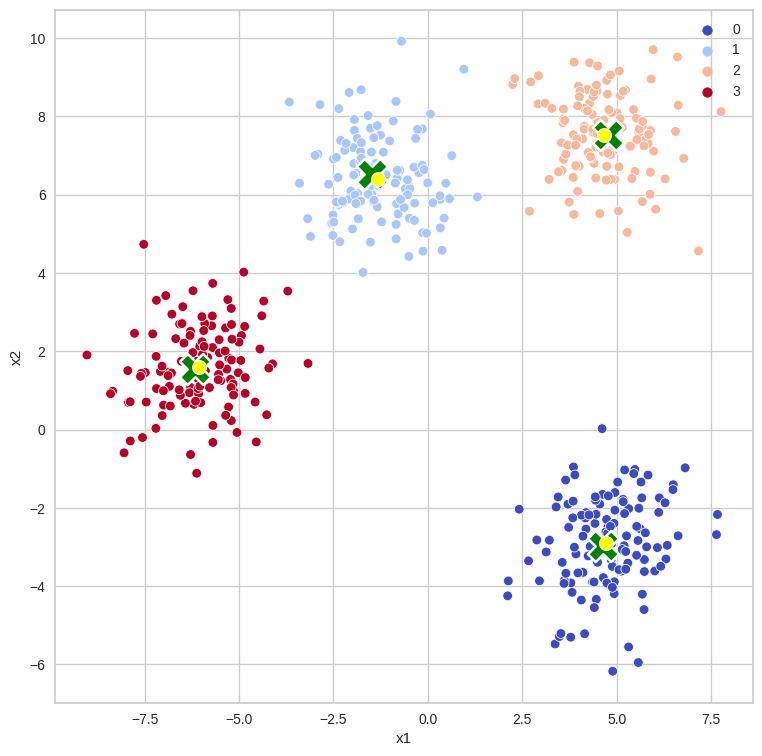

In [38]:
fig = plt.figure(figsize=(9,9))

# Clusters como hue
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')

#Centroides reales
sns.scatterplot(data=df_centers, x='x1', y='x2',marker= 'X', s=500, color= 'green')

#Centroides predichos
sns.scatterplot(data=df_k_means_centers, x='x1', y='x2',marker= 'o', s=100, color= 'yellow')

plt.show()

## Creemos función para iterar sobre k

* Crear funcion

In [39]:
def vis_cluster(k):

  #creo modelo ysaco data
  kmeans = KMeans(n_clusters = k)
  df_cluster = kmeans.fit_predict(X);
  df_blobs['cluster'] = df_cluster
  k_means_centers = kmeans.cluster_centers_

  df_k_means_centers = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1],
  })

  #grafico
  fig = plt.figure(figsize=(9,9))

  sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
  sns.scatterplot(data=df_centers, x='x1', y='x2',marker= 'X', s=500, color= 'green')
  sns.scatterplot(data=df_k_means_centers, x='x1', y='x2',marker= 'o', s=100, color= 'yellow')

  plt.show()

* Iterar sobre la funcion para distitnots k

3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


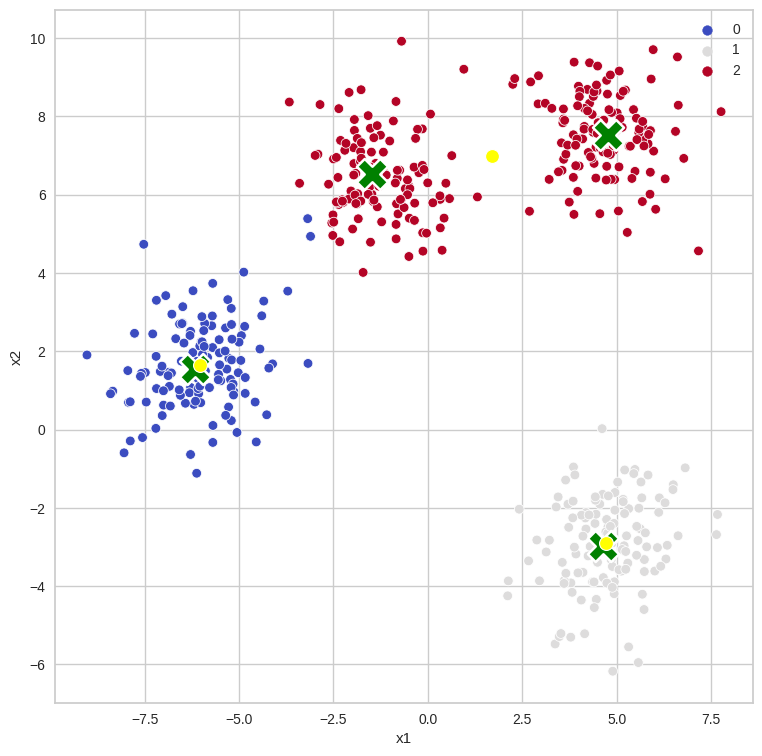

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


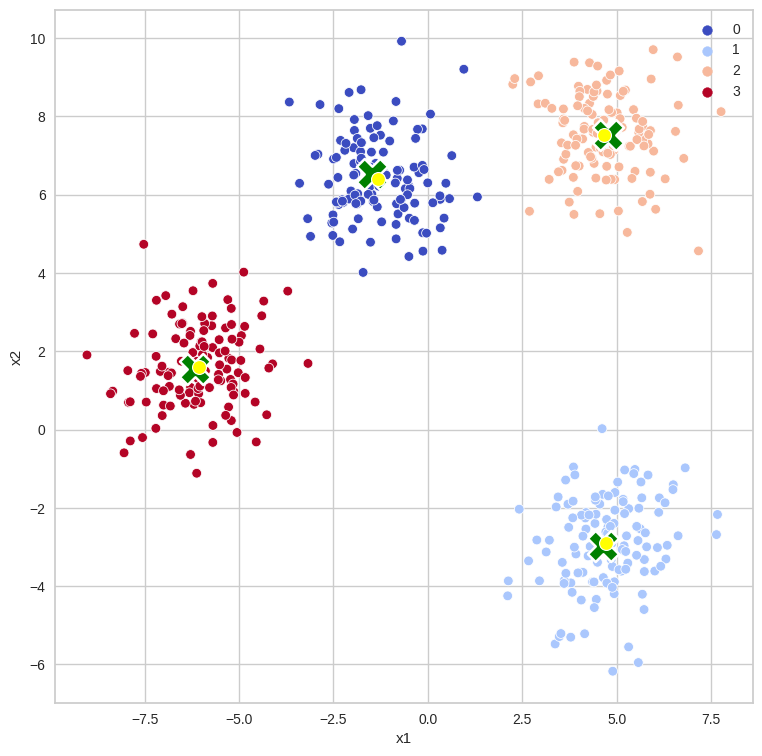

5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


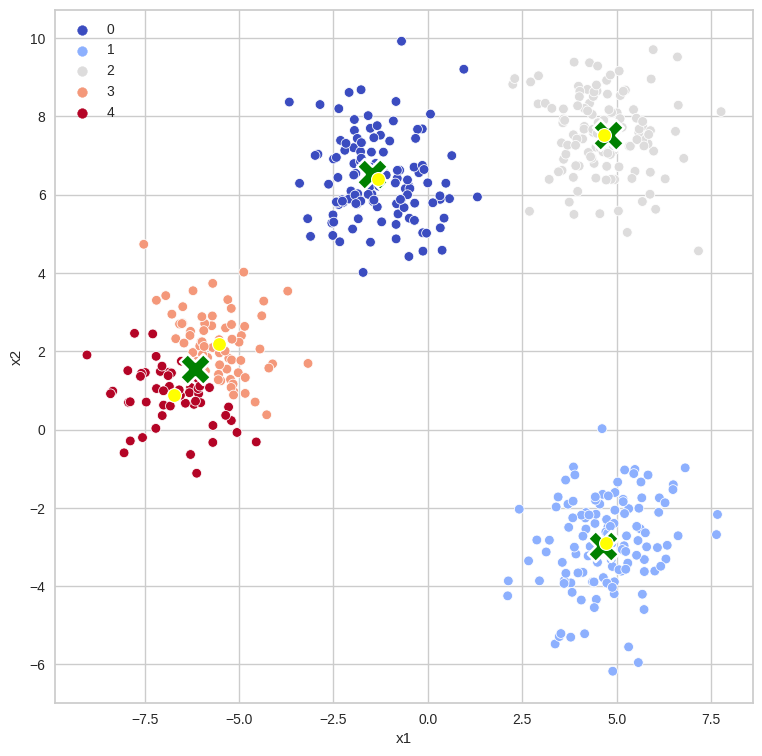

6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


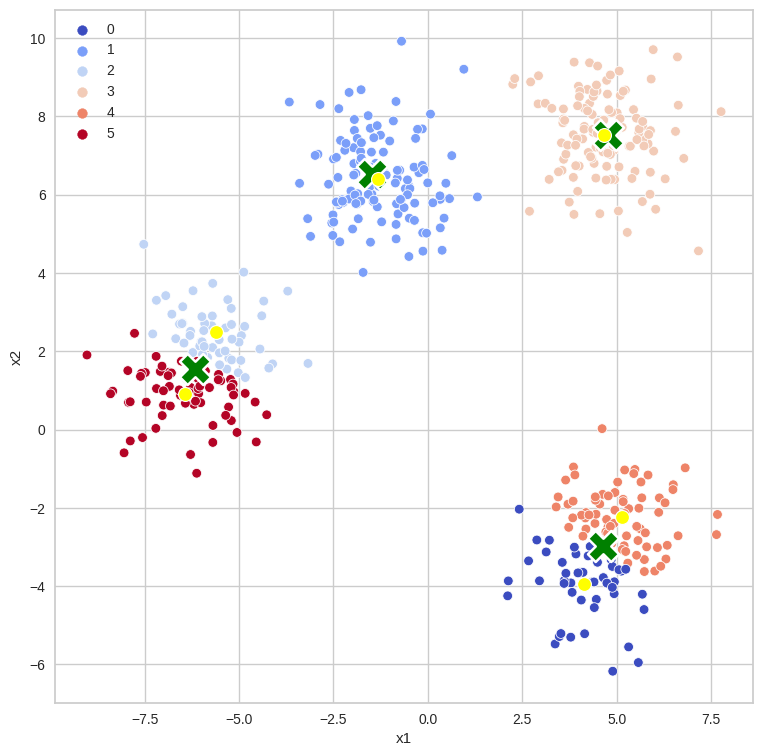

In [40]:
for _ in range (3,7):
  print(_)
  vis_cluster(_)

# Encontrado valor de k

## Método del Codo

* Entreno modelo y saco sus distnacias cuadradas por iteración

In [41]:
#Creo lista donde almacenaré suma de cuadrados
sum_of_squared_distances = []

#creo rango para k
K = range(2,15)

for k in K:
  #creo modeloy entreno
  km = KMeans(n_clusters = k);
  km = km.fit(X);

  #guardo la inercia/suma de ditancias cudradas
  sum_of_squared_distances.append(km.inertia_);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* Grafico para elegir codo (inercia vs k clusters)

<function matplotlib.pyplot.show(close=None, block=None)>

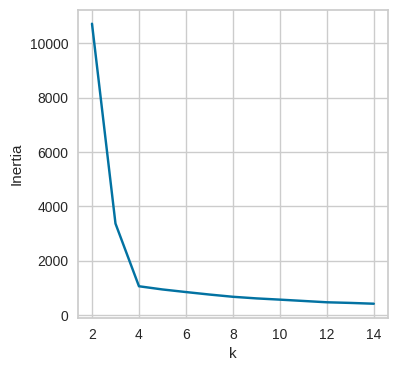

In [42]:
plt.figure(figsize=(4,4))
#grafica, en y intrecia, en x numero k de clusters
#blue, martkers en x, y linea continua
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show

## Método de silueta

* Entreno modelo y saco coef's de silueta por iteración

In [43]:
#Creo lista donde almacenaré suma de cuadrados
silhouette_scores = []

#creo rango para k
K = range(2,15)

for k in K:
  #creo modeloy entreno
  km = KMeans(n_clusters = k);
  km = km.fit(X);
  y = km.predict(X)

  #guardo la inercia/suma de ditancias cudradas
  silhouette_scores.append(silhouette_score(X,y));

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* Grafico para observar coef's de silueta

<function matplotlib.pyplot.show(close=None, block=None)>

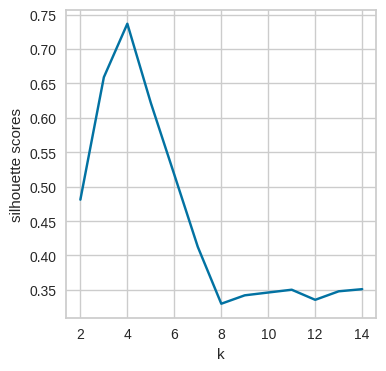

In [44]:
plt.figure(figsize=(4,4))
#grafica, en y intrecia, en x numero k de clusters
#blue, martkers en x, y linea continua
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette scores')
plt.show

# Evaluación del modelo

* Grafiquemos clusterización para el K encontrado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


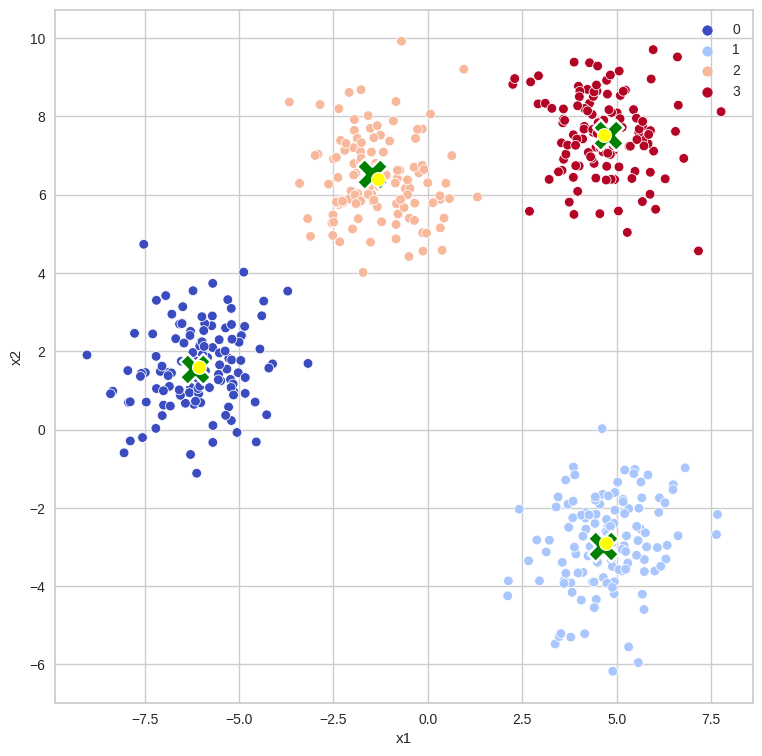

In [45]:
vis_cluster(4)

* Creo modelo

In [46]:
km = KMeans(n_clusters =4)

* Creo Visualizer, y a el le hago fit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

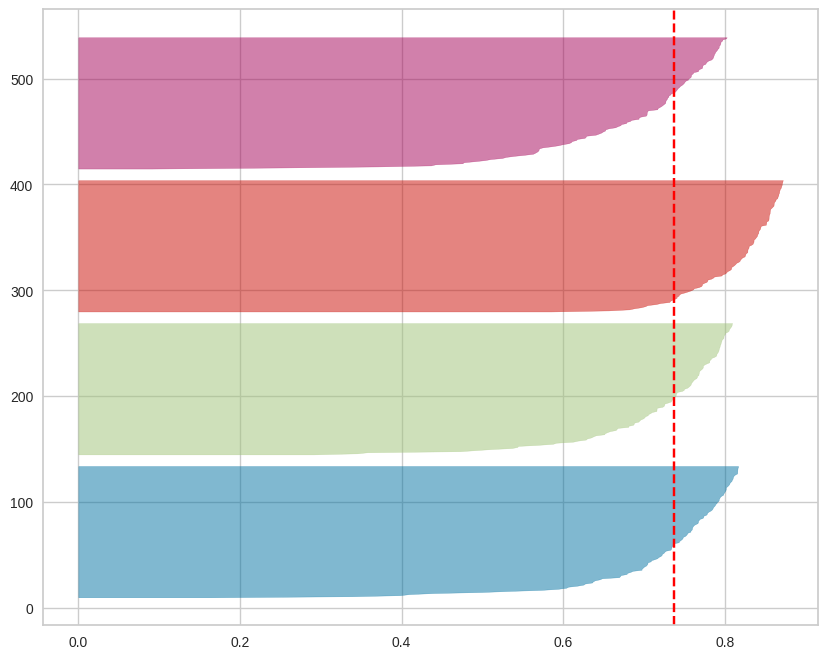

In [48]:
plt.figure(figsize=(10,8))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)